https://data.cityofnewyork.us/Environment/New-York-City-s-Flood-Vulnerability-Index/mrjc-v9pm/about_data

In [93]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely import wkt

from matplotlib.colors import ListedColormap, BoundaryNorm

import matplotlib.cm as cm

import matplotlib.colors as mcolors




In [54]:
# Read the shapefile
df = pd.read_csv("New_York_City_s_Flood_Vulnerability_Index_20240930.csv")

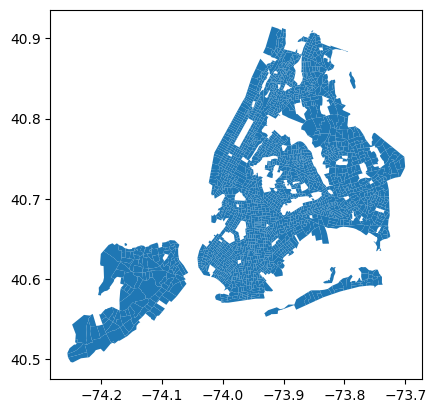

In [55]:
# Read the shapefile
gdf = gpd.read_file("/Users/bricenfisher/Downloads/New York City's Flood Vulnerability Index_20240930/geo_export_d5f0fd6a-fb11-4302-8722-c77598d0deab.shp")

# Plot the shapefile
gdf.plot()

# Show the plot
plt.show()

In [56]:
print(gdf.head(2))

         geoid fshri ss_cur ss_50s ss_80s tid_20s tid_50s tid_80s  \
0  36081036300     5    NaN    NaN    NaN     NaN     NaN     NaN   
1  36047058000     5    NaN    NaN      2     NaN     NaN     NaN   

                                            geometry  
0  POLYGON ((-73.87135 40.76233, -73.86826 40.761...  
1  POLYGON ((-73.95776 40.60099, -73.95683 40.601...  


In [57]:
gdf['ss_cur'] = gdf['ss_cur'].fillna(0)
print(gdf.head(2))

         geoid fshri ss_cur ss_50s ss_80s tid_20s tid_50s tid_80s  \
0  36081036300     5      0    NaN    NaN     NaN     NaN     NaN   
1  36047058000     5      0    NaN      2     NaN     NaN     NaN   

                                            geometry  
0  POLYGON ((-73.87135 40.76233, -73.86826 40.761...  
1  POLYGON ((-73.95776 40.60099, -73.95683 40.601...  


In [58]:
# Define your custom color list (6 colors)
colors = ['#ffffff', '#fc8d59', '#fee08b', '#d9ef8b', '#91cf60', '#1a9850']  # Customize these colors

# Create a custom colormap
cmap = ListedColormap(colors)

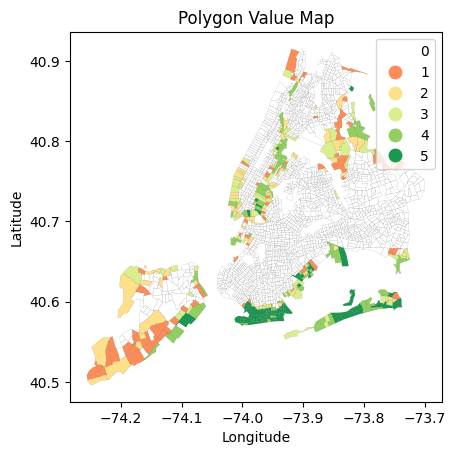

In [63]:
# Plot the polygons, colored by a specific column (replace 'value_column' with your actual column name)
gdf.plot(column='ss_cur', legend=True, cmap=cmap, edgecolor='black',linewidth= 0.05)

# Customize and show the plot
#plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=plt.gca(), boundaries=bounds, ticks=bounds[:-1])
plt.title('Polygon Value Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Let's get the subway MTA data

In [64]:
csvFile = pd.read_csv('/Users/bricenfisher/Documents/GitHub/NYC-MTA-Project/MTA_Subway_Entrances_and_Exits__2024_20240930.csv')
print(csvFile.head(1))

points = csvFile['entrance_georeference']

  Division    Line Borough                 Stop Name  Complex ID  \
0      BMT  4th Av       B  Atlantic Av-Barclays Ctr         617   

   Constituent Station Name  Station ID GTFS Stop ID     Daytime Routes  \
0  Atlantic Av-Barclays Ctr          27          R31  2 3 4 5 B D N Q R   

  Entrance Type Entry Allowed Exit Allowed  Entrance Latitude  \
0         Stair           YES          YES          40.683905   

   Entrance Longitude         entrance_georeference  
0          -73.978879  POINT (-73.978879 40.683905)  


In [65]:
print(points)

0         POINT (-73.978879 40.683905)
1         POINT (-73.978487 40.683805)
2         POINT (-73.978412 40.683928)
3       POINT (-73.9834296 40.6771544)
4       POINT (-73.9833364 40.6772958)
                     ...              
2115      POINT (-73.986958 40.597889)
2116      POINT (-73.983791 40.588305)
2117      POINT (-73.983735 40.588022)
2118    POINT (-73.9835485 40.5883299)
2119    POINT (-73.9834982 40.5880448)
Name: entrance_georeference, Length: 2120, dtype: object


0         POINT (-73.978879 40.683905)
1         POINT (-73.978487 40.683805)
2         POINT (-73.978412 40.683928)
3       POINT (-73.9834296 40.6771544)
4       POINT (-73.9833364 40.6772958)
                     ...              
2115      POINT (-73.986958 40.597889)
2116      POINT (-73.983791 40.588305)
2117      POINT (-73.983735 40.588022)
2118    POINT (-73.9835485 40.5883299)
2119    POINT (-73.9834982 40.5880448)
Name: entrance_georeference, Length: 2120, dtype: object


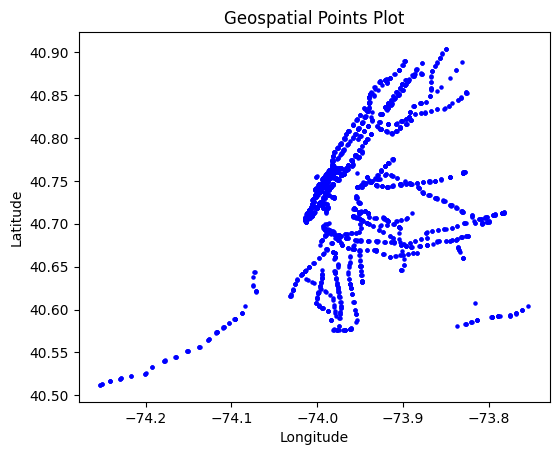

In [66]:
print(points)

# Extract longitude and latitude from POINT strings
coords = [Point(float(p.split()[1][1:]), float(p.split()[2][:-1])) for p in points]

# Create a GeoDataFrame
gdf_subways = gpd.GeoDataFrame(geometry=coords)

# Plot the points
gdf_subways.plot(marker='o', color='blue', markersize=5)

# Add titles and labels
plt.title("Geospatial Points Plot")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

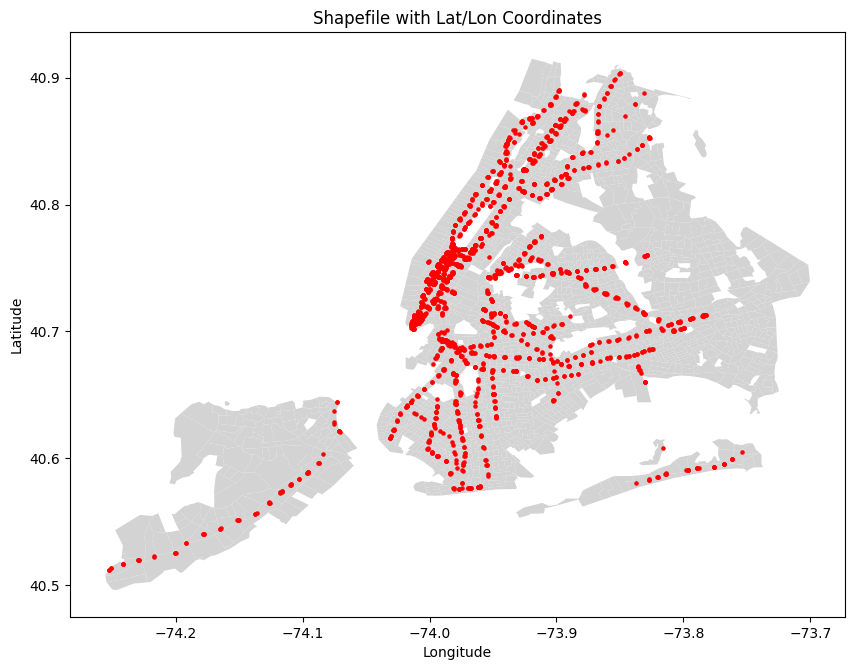

In [69]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Step 1: Load the shapefile
gdf = gpd.read_file(("/Users/bricenfisher/Downloads/New York City's Flood Vulnerability Index_20240930/geo_export_d5f0fd6a-fb11-4302-8722-c77598d0deab.shp"))

# Step 4: Plot the shapefile and points together
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the shapefile
gdf.plot(ax=ax, color='lightgray')

# Plot the lat/lon points
gdf_subways.plot(ax=ax, marker='o', color='red', markersize=5)

# Customize plot
plt.title("Shapefile with Lat/Lon Coordinates")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.show()

Let's see how many stations are in each district

In [70]:
print(gdf_subways)

                        geometry
0     POINT (-73.97888 40.68391)
1     POINT (-73.97849 40.68380)
2     POINT (-73.97841 40.68393)
3     POINT (-73.98343 40.67715)
4     POINT (-73.98334 40.67730)
...                          ...
2115  POINT (-73.98696 40.59789)
2116  POINT (-73.98379 40.58830)
2117  POINT (-73.98373 40.58802)
2118  POINT (-73.98355 40.58833)
2119  POINT (-73.98350 40.58804)

[2120 rows x 1 columns]


In [71]:
gdf_subways.set_crs(epsg=4326, inplace=True)


,geometry
0,POINT (-73.97888 40.68391)
1,POINT (-73.97849 40.68380)
2,POINT (-73.97841 40.68393)
3,POINT (-73.98343 40.67715)
4,POINT (-73.98334 40.67730)
...,...
2115,POINT (-73.98696 40.59789)
2116,POINT (-73.98379 40.58830)
2117,POINT (-73.98373 40.58802)
2118,POINT (-73.98355 40.58833)


In [73]:
gdf.set_crs(epsg=4326, inplace=True,allow_override=True)


,geoid,fshri,ss_cur,ss_50s,ss_80s,tid_20s,tid_50s,tid_80s,geometry
0,36081036300,5,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-73.87135 40.76233, -73.86826 40.761..."
1,36047058000,5,NaN,NaN,2,NaN,NaN,NaN,"POLYGON ((-73.95776 40.60099, -73.95683 40.601..."
2,36047053200,5,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-73.96230 40.62996, -73.96137 40.630..."
3,36005036300,5,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-73.88545 40.84377, -73.88529 40.844..."
4,36081035700,5,1,1,1,NaN,NaN,NaN,"POLYGON ((-73.87639 40.76900, -73.87602 40.770..."
...,...,...,...,...,...,...,...,...,...
2204,36061004700,1,3,3,3,NaN,NaN,NaN,"POLYGON ((-74.00479 40.72362, -74.00458 40.724..."
2205,36061025500,1,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-73.95416 40.84799, -73.95283 40.851..."
2206,36061027700,1,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-73.93008 40.85431, -73.92964 40.854..."
2207,36005009302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-73.90307 40.80988, -73.89917 40.812..."


In [76]:
# Set the coordinate reference system (CRS) for both datasets
# Assuming your shapefile and points use the same CRS, e.g., WGS84 (EPSG:4326)

# Perform a spatial join to find which district each point falls into
points_in_districts = gpd.sjoin(gdf_subways, gdf, how='left', op='within')

# Now count how many points are in each district
points_count = points_in_districts.groupby('geoid').size().reset_index(name='points_count')

print(points_count)

           geoid  points_count
0    36005002300             4
1    36005002500             2
2    36005002702             4
3    36005003100             4
4    36005003300             1
..           ...           ...
652  36085017005             6
653  36085019800             3
654  36085022601             2
655  36085022602             4
656  36085024800             7

[657 rows x 2 columns]


/Users/bricenfisher/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [78]:
print((points_count.max()))

geoid           36085024800
points_count             49
dtype: object


Let's plot

In [79]:
# Merging the DataFrames on the 'geoid' column

merged_df = pd.merge(gdf, points_count, on='geoid') #, how='inner')  # 'how' can be 'inner', 'outer', 'left', or 'right'

print(merged_df)

           geoid fshri ss_cur ss_50s ss_80s tid_20s tid_50s tid_80s  \
0    36047058000     5    NaN    NaN      2     NaN     NaN     NaN   
1    36047053200     5    NaN    NaN    NaN     NaN     NaN     NaN   
2    36005005400     5      1      1      2       2       2       1   
3    36047046201     5    NaN    NaN    NaN     NaN     NaN     NaN   
4    36047091800     5    NaN    NaN    NaN     NaN     NaN     NaN   
..           ...   ...    ...    ...    ...     ...     ...     ...   
652  36061005700     1    NaN    NaN    NaN     NaN     NaN     NaN   
653  36047049500     1    NaN    NaN    NaN     NaN     NaN     NaN   
654  36047004300     1    NaN    NaN    NaN     NaN     NaN     NaN   
655  36061004700     1      3      3      3     NaN     NaN     NaN   
656  36061025500     1    NaN    NaN    NaN     NaN     NaN     NaN   

                                              geometry  points_count  
0    POLYGON ((-73.95776 40.60099, -73.95683 40.601...             2  
1    

/var/folders/wm/w3d80c152lq65mt41y20p1200000gn/T/ipykernel_2121/3447188113.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Blues')


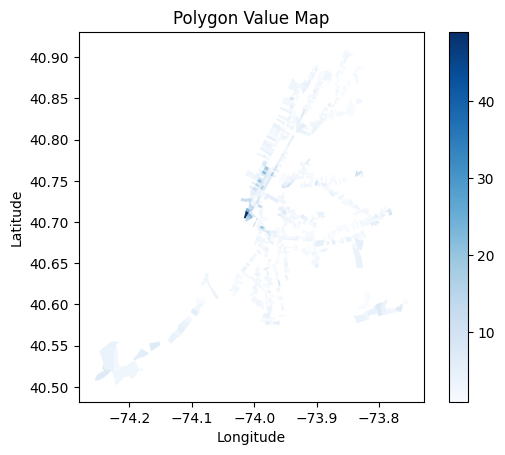

In [94]:
# Plot the polygons, colored by a specific column (replace 'value_column' with your actual column name)
cmap = cm.get_cmap('Blues')
# Normalize the color map to the range of your data
norm = mcolors.Normalize(vmin=min(merged_df['points_count']), vmax=max(merged_df['points_count']))

merged_df.plot(column='points_count', legend=True, edgecolor='black',linewidth = 0.001,cmap=cmap, norm=norm)

# Customize and show the plot
#plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=plt.gca(), boundaries=bounds, ticks=bounds[:-1])
plt.title('Polygon Value Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()